In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso ,LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report### reporte de confusion matrix


In [2]:
data = pd.read_csv(r'datos_etiquetados_con_caracteristicas2V.csv')

In [3]:
data.head()

,Unnamed: 0,Media_VolUnCorrected,Media_VolCorrected,Media_Pressure,Media_Temperature,Media_SoloAntesNum,Mediana_VolUnCorrected,Mediana_VolCorrected,Mediana_Pressure,Mediana_Temperature,...,4 Dias_antesPres,3 Dias_antesVol,3 Dias_antesTemp,3 Dias_antesPres,2 Dias_antesVol,2 Dias_antesTemp,2 Dias_antesPres,1 Dias_antesVol,1 Dias_antesTemp,1 Dias_antesPres
0,0,0.004941,0.007200,0.055506,-0.250344,0.0,0.083457,0.076993,0.002996,-0.250344,...,0.002996,0.408908,-0.250344,0.063584,0.412212,-0.250344,0.002996,0.261704,-0.250344,0.124173
1,1,-0.009016,-0.004009,0.067623,-0.250344,0.0,0.083457,0.076993,0.002996,-0.250344,...,0.063584,0.412212,-0.250344,0.002996,0.261704,-0.250344,0.124173,-0.405585,-0.250344,0.487702
2,2,-0.112007,-0.109130,0.077722,-0.250344,0.0,0.069489,0.050932,0.002996,-0.250344,...,0.002996,0.261704,-0.250344,0.124173,-0.405585,-0.250344,0.487702,-2.950570,-0.250344,0.366526
3,3,-0.108510,-0.106957,0.073682,-0.250344,0.0,0.083457,0.050932,0.002996,-0.250344,...,0.124173,-0.405585,-0.250344,0.487702,-2.950570,-0.250344,0.366526,0.168606,-0.250344,0.002996
4,4,-0.088941,-0.090616,0.059545,-0.250344,0.0,0.093255,0.076993,0.002996,-0.250344,...,0.487702,-2.950570,-0.250344,0.366526,0.168606,-0.250344,0.002996,0.138969,-0.250344,0.063584


In [4]:
pd.set_option('display.max_rows', None)
data.columns

Index(['Unnamed: 0', 'Media_VolUnCorrected', 'Media_VolCorrected',
       'Media_Pressure', 'Media_Temperature', 'Media_SoloAntesNum',
       'Mediana_VolUnCorrected', 'Mediana_VolCorrected', 'Mediana_Pressure',
       'Mediana_Temperature',
       ...
       '4 Dias_antesPres', '3 Dias_antesVol', '3 Dias_antesTemp',
       '3 Dias_antesPres', '2 Dias_antesVol', '2 Dias_antesTemp',
       '2 Dias_antesPres', '1 Dias_antesVol', '1 Dias_antesTemp',
       '1 Dias_antesPres'],
      dtype='object', length=111)

In [5]:
X = data.drop(['Unnamed: 0', 'index','SoloAntesNum','Daily_Date','id_sitio','index'],axis = 1)
y = data['SoloAntesNum']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
ridge_reg = Ridge()
params_Ridge = {'alpha': [10,5,1,0.1,0.01,0.001,0.0001,0] ,  "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(X_train,y_train)
Ridge_GS.best_params_

{'alpha': 1, 'solver': 'sparse_cg'}

In [8]:
lasso_reg = Lasso()
params_Ridge = {'alpha': [10,5,1,0.1,0.01,0.001,0.0001,0] }
lasso_GS = GridSearchCV(lasso_reg, param_grid=params_Ridge, n_jobs=-1)
lasso_GS.fit(X_train,y_train)
lasso_GS.best_params_

{'alpha': 0.0001}

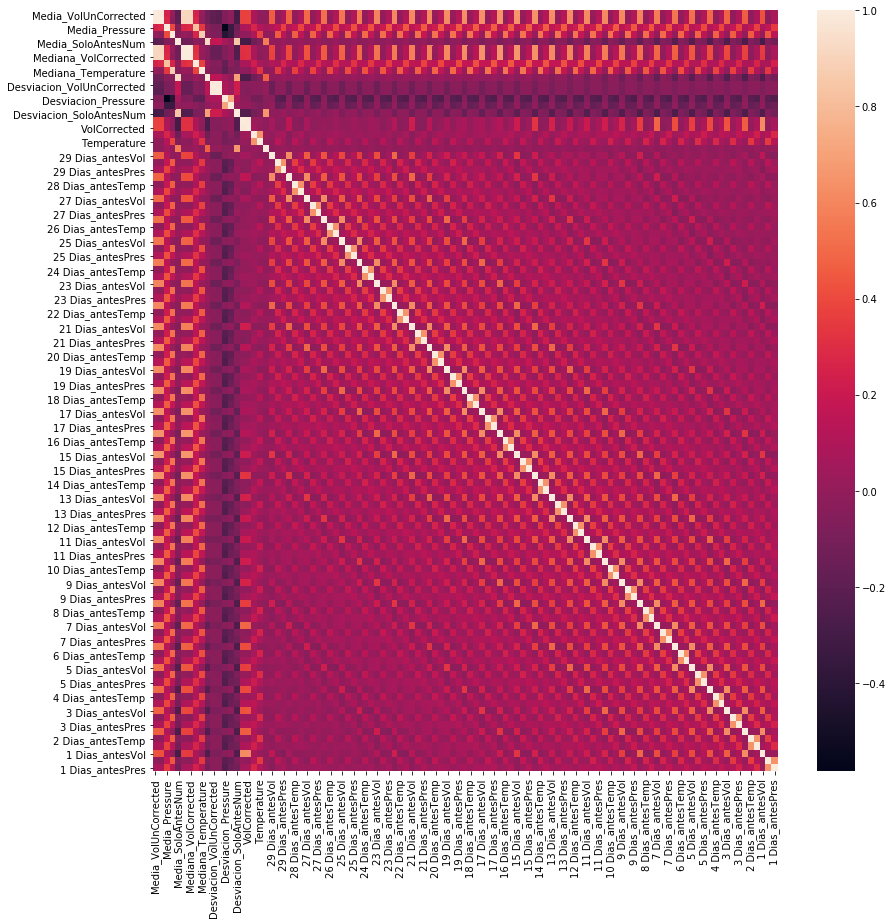

In [9]:
plt.figure(figsize=(14,14))
sns.heatmap( data.drop(['Unnamed: 0', 'index','Daily_Date','id_sitio','index'],axis = 1).corr())

In [10]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],"class_weight" :['balanced']}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=500)
logreg_cv=GridSearchCV(logreg,grid,cv=5,scoring='precision', n_jobs=-1)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, retur

In [11]:
logreg_cv.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [16]:
y_pred = logreg_cv.best_estimator_.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3638   40]
 [   9   91]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3678
           1       0.69      0.91      0.79       100

    accuracy                           0.99      3778
   macro avg       0.85      0.95      0.89      3778
weighted avg       0.99      0.99      0.99      3778



In [23]:
from sklearn.svm import SVC 
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid'],"class_weight" :['balanced']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,n_jobs=-1,scoring='precision')
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 21.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=2)

In [24]:
y_pred = grid.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3675    3]
 [  64   36]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3678
           1       0.92      0.36      0.52       100

    accuracy                           0.98      3778
   macro avg       0.95      0.68      0.75      3778
weighted avg       0.98      0.98      0.98      3778



In [29]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=500)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5,scoring='precision',verbose=2)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 20.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=500, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],


In [30]:
y_pred = clf.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3675    3]
 [  24   76]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3678
           1       0.96      0.76      0.85       100

    accuracy                           0.99      3778
   macro avg       0.98      0.88      0.92      3778
weighted avg       0.99      0.99      0.99      3778

